# <span style='color:#4B0082'> Image Brightness Correction Methods
Image brightness correction is an operation within image processing which makes images brighter in aspect and more watchable. Within the typical course of action towards the correction of the brightness, Linear Brightness and Contrast Adjustment and Gamma Correction can be noted.

## <span style='color:#6A5ACD'> 1. Linear Brightness and Contrast Adjustment </span>
### 1.1 Overview
Linear brightness and contrast adjustment is a basic way of changing the contrast and brightness of an image. It is done by applying a linear transformation to the pixel value of the image.

### 1.2 Mathematical Representation
Mathematically, the transformation is given below:

[ I' = alpha * I + beta ]

Where:

( I ) is the original intensity of a pixel.<br/>
( I' ) is the new pixel intensity after modification.<br/>
( alpha ) is the factor of contrast (scaling factor).<br/>
( beta ) is the offset of brightness (translation factor).<br/>
### 1.3 Parameters
Contrast Factor ( alpha ):
A value > 1 increases contrast, darkens dark regions and lightens bright regions.
A value between 0 and 1 decreases contrast, creating a flatter picture.<br/>
Brightness Offset ( beta ):
Positive values make brighter, negative values make darker.
### 1.4  Applications
Basic Image Editing: Used in picture editing software to enhance images using brightness and contrast correction.<br/>
Image Preprocessing: Used extensively in computer vision problems to ease feature extraction.<br/>
Medical Imaging: Enhances contrast between structures in X-rays or MRIs.<br/>
### 1.5 When to Use
Use this technique when global brightness and contrast require a quick fix.
Best used in photos where linear relationships among pixel intensities are sufficient to enhance.
## <span style='color:#6A5ACD'> 2. Gamma Correction
### 2.1 Overview
Gamma correction is a nonlinear image adjustment technique used to correct the brightness of an image based on human perception. Gamma correction comes in handy during correcting images that are too dark or too bright due to display factors.

### 2.2 Mathematical Representation
The gamma correction can be expressed as:

 I' = [ (I/255)^(gamma) ]*255

Where:

( I ) denotes the original pixel intensity.<br/>
( I' ) denotes the corrected pixel intensity.<br/>
(gamma ) is the gamma value (exponent).
### 2.3 Parameters
Gamma Value ( gamma ):
If ( gamma < 1 ), The image will become brighter (lightening effect).
If ( gamma > 1 ), The image will become darker (darkening effect).
### 2.4 Applications
Display Calibration: Used to correct images for different display devices to achieve equal brightness.<br/>
Photography: Corrects exposure issues in photos taken under different light conditions.<br/>
Video Processing: Enhances video frames for better viewing experience by adjusting overall brightness.<br/>
### 2.5 When to Use
Apply gamma correction to images that are under-exposed or where brightness needs to be adjusted without significantly affecting contrast.
Best suited for applications where human visual perception of light intensity is extremely critical, such as photography and video.


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_original = cv2.imread("GammaImage.jpg")  

#You can find image in images 

### <span style='color:#6A5ACD'> Linear Brightness and Contrast Adjustment </span>

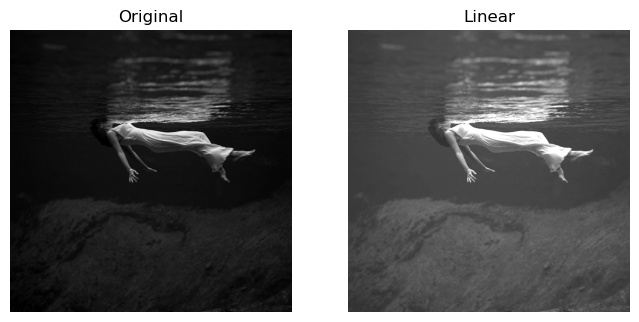

In [3]:
output_linear= cv2.convertScaleAbs(img_original, alpha=1.3, beta=50) 

plt.figure(figsize=[8,8])
plt.subplot(121);plt.imshow(img_original[...,::-1]);plt.title("Original"); plt.axis('off');
plt.subplot(122);plt.imshow(output_linear[...,::-1]);plt.title("Linear"); plt.axis('off');

### <span style='color:#6A5ACD'> 2. Gamma Correction with different gamma [2, 0.5, 0.33, 0.25]
You can read more about gamma correction in https://en.wikipedia.org/wiki/Gamma_correction    

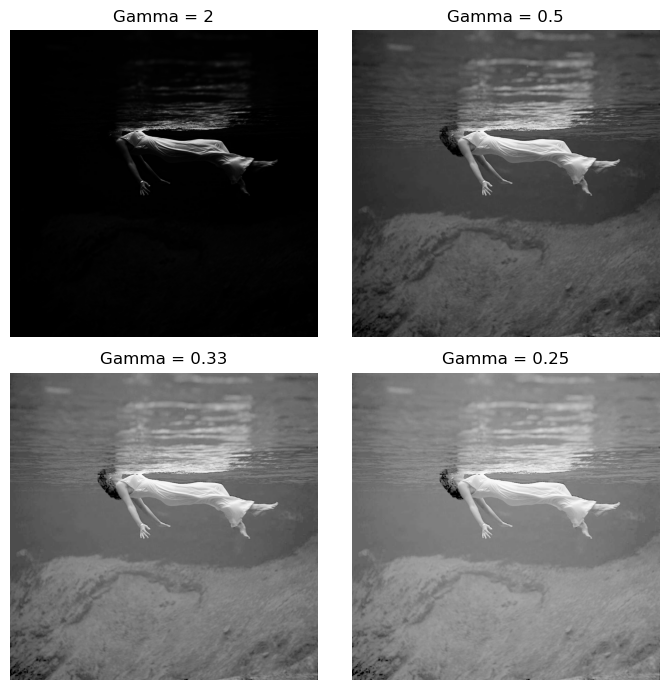

In [4]:
gamma = [2, 0.5, 0.33, 0.25]
output_gammacorrected = []

# Process each gamma value
for j in range(len(gamma)):
    # Create a lookup table for the current gamma value
    lookUpTable = np.empty((1, 256), np.uint8)
    
    for i in range(256):
        # Calculate the lookup table values
        lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma[j]) * 255.0, 0, 255)
    
    # Apply the LUT to the original image
    output_gammacorrected.append(cv2.LUT(img_original, lookUpTable))
    

plt.figure(figsize=[7, 7])

for idx, output_image in enumerate(output_gammacorrected):
    plt.subplot(2, 2, idx + 1) 
    plt.imshow(output_image[..., ::-1]) 
    plt.title(f"Gamma = {gamma[idx]}")  
    plt.axis('off')  

plt.tight_layout() 
plt.show()

 




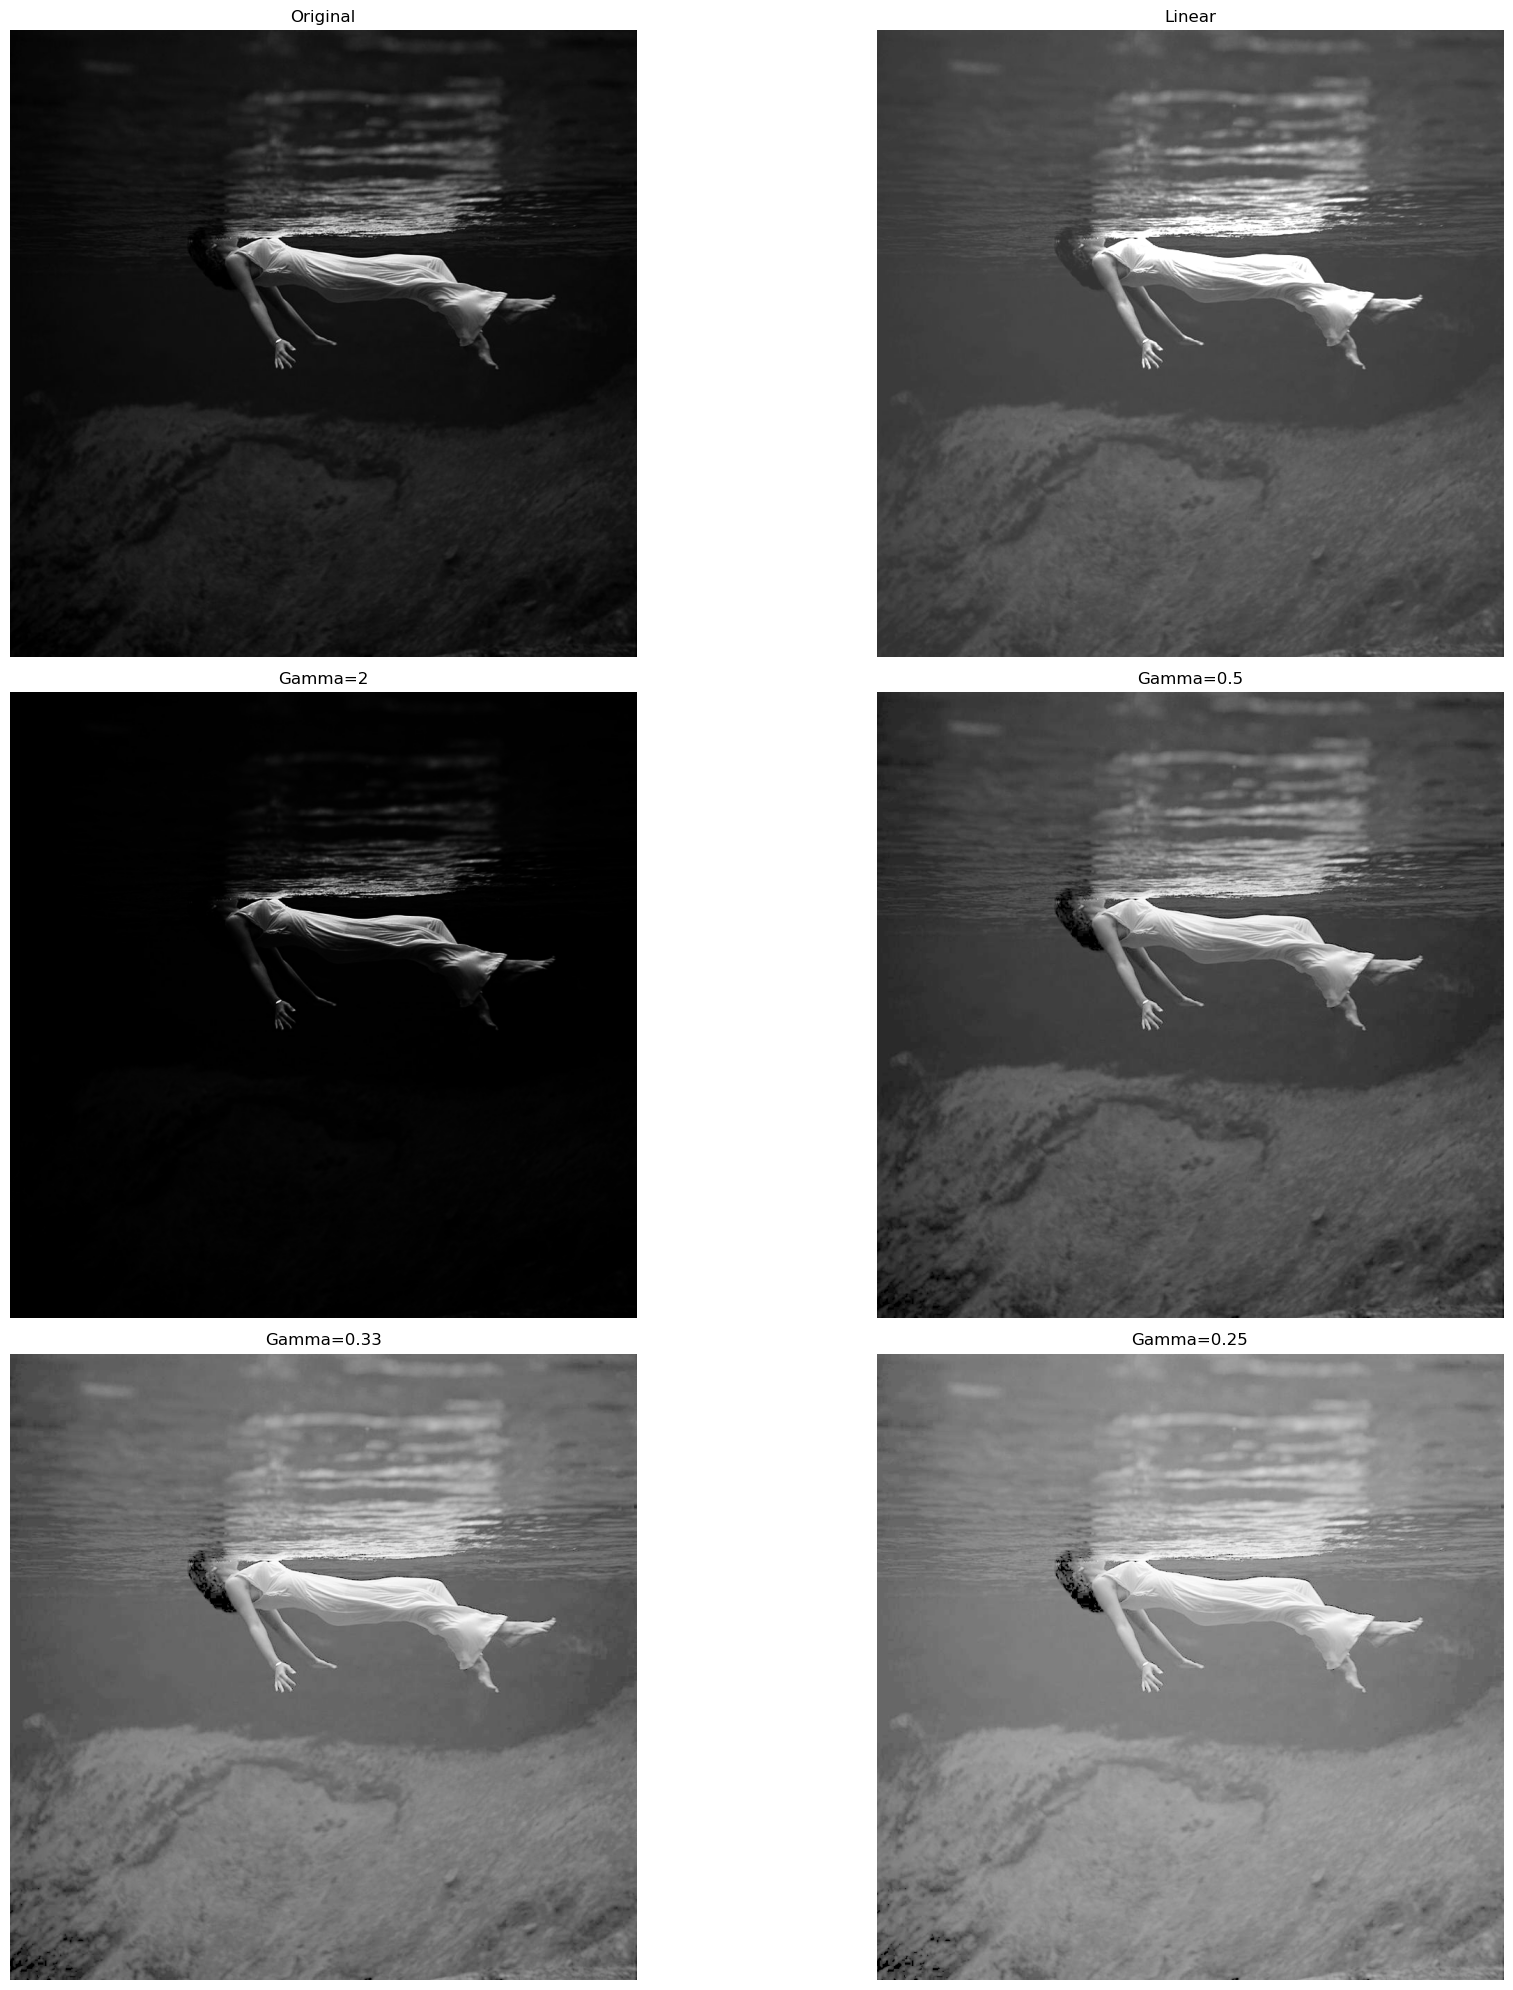

In [5]:
plt.figure(figsize=[20,20])
plt.subplot(321);plt.imshow(img_original[...,::-1]);plt.title("Original"); plt.axis('off');
plt.subplot(322);plt.imshow(output_linear[...,::-1]);plt.title("Linear"); plt.axis('off');
plt.subplot(323);plt.imshow(output_gammacorrected[0][...,::-1]);plt.title("Gamma=2");plt.axis('off');
plt.subplot(324);plt.imshow(output_gammacorrected[1][...,::-1]);plt.title("Gamma=0.5");plt.axis('off');
plt.subplot(325);plt.imshow(output_gammacorrected[2][...,::-1]);plt.title("Gamma=0.33");plt.axis('off');
plt.subplot(326);plt.imshow(output_gammacorrected[3][...,::-1]);plt.title("Gamma=0.25");plt.axis('off');
plt.tight_layout() 
plt.show()